Lets go ahead and install and import all the libraries which will come in handy for this task, as well as those which will be helpful when we are making the model and saving the results.

In [193]:
%matplotlib inline
!pip install pandas
!pip install scipy

In [194]:
import csv # for reading data
import pandas as pd # for manipulating data
from matplotlib import pyplot as plt
from scipy import misc
import numpy as np

In [195]:
sample_img = misc.imread('train/5.png', mode='L') # Let's read in the 5th image.

(-0.5, 31.5, 31.5, -0.5)

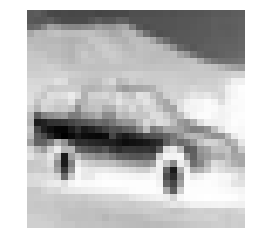

In [196]:
plt.imshow(sample_img, cmap='Greys') # cmap argument tells matplotlib how to render the image. I means black and white
plt.axis('off')

In [197]:
labels = pd.read_csv('trainLabels.csv')

In [198]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [316]:
sample_img.shape

(32, 32)

In [312]:
# Read in all the images into a list
list_ = []
for i in range(1, 50001):
    list_.append(misc.imread('train/' + str(i) + '.png', mode='I'))

In [313]:
# Convert the list into a panel
training_data = pd.Panel(list_)

In [386]:
# rand_indices = np.random.randint(1,50001, size=4)
# for i, ix in enumerate(rand_indices): # enumerate is a python function which automatically creates a counter for you
#     plt.figure(i)
#     plt.imshow(training_data.iloc[ix], cmap='Greys')
#     plt.title(labels.iloc[ix])
#     plt.draw() #what is the point

Averageing all labels

In [317]:
categories = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
average_list = []
for i, category in enumerate(categories):
    imgs_in_category = training_data[labels['label'] == category]
    avg = imgs_in_category.mean(axis=0).as_matrix()
    average_list.append(avg)

For creating dataframe

In [ ]:
ouput_df = pd.DataFrame(columns=["item","category"])
ouput_df.loc[len(ouput_df)]=['10',"10"] # adding a coulmn

In [318]:
average_panel = pd.Panel(average_list)


In [388]:
output_label =[]
for imgDataLoc in range(0,50000):

    img1 = training_data.iloc[imgDataLoc]
    out_list =[]

    for x in range(10):
        img2 = average_panel[x]
        result = ((img1 - img2)**2).sum().sum()
        out_list.append(result)

    count = 0
    min = out_list[0]
    for x in out_list:
        if x < min:
            min = x
            img_label = count
        count += 1
    output_label.append(categories[img_label])

In [412]:
#output_label = np.array(output_label)
output_df = pd.DataFrame(output_label,columns=["label"],index=[x for x in range(1,50001)])
#ouput_df.loc[len(ouput_df)]=['10',"10"] # adding a coulmn

In [413]:
output_df.to_csv("predicted labels.csv")

In [352]:
out_list

[3330342.92036888,
 2164747.6894225595,
 2156141.45120268,
 1721588.3568692403,
 1780046.2153787198,
 1626960.9114980402,
 1627008.1699290802,
 2241066.6192659596,
 3011973.6720601195,
 3368717.7385522393]

<module 'pandas' from '/Users/saikasam/anaconda3/lib/python3.6/site-packages/pandas/__init__.py'>